In [1]:
import sklearn.linear_model
import sklearn.ensemble
from sklearn.cross_validation import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from featuresVectorsAggregation import dfAggr

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def mean_split(threshold_par):
    true_count=false_count = 0
    tp=tn=fp=fn = 0
    prediction = []
    # For each event
    for row in range(dfAggr.shape[0]):
        #print('\n\nmean', dfAggr['mean'].values[row])
        #print('truth', dfAggr['truth'].values[row])
        if dfAggr['mean'].values[row] >= threshold_par:
            prediction.append(1)
            # true_count += 1
            # if dfAggr['truth'].values[row] == 1:
            #     tp += 1
            #     #print(1, 'tp')
            # else:
            #     fp += 1
            #     #print(1, 'fp')
        else:
            prediction.append(0)
            # false_count += 1
            # if dfAggr['truth'].values[row] == 1:
            #     fn += 1
            #     #print(0, 'fn')
            # else:
            #     tn += 1
            #     #print(0, 'tn')

    #return (prediction, true_count, false_count, tp, tn, fp, fn)
    return (prediction)

In [3]:
def metrics_results(threshold, label, prediction, confusion_matrix):

    #prediction = dfAggr['mean'].values
    #ValueError: Classification metrics can't handle a mix of binary and continuous targets
    #print(prediction)


    #Metrics
    
    # Proportion of true results (both true positives and true negatives)
    # among the total number of cases examined
    accuracy = accuracy_score(label, prediction)

    #
    precision = precision_score(label, prediction)

    # TPR/Recall/Sensitivity
    recall = recall_score(label, prediction)

    # A measure that combines precision and recall is
    # the harmonic mean of precision and recall
    f1 = f1_score(label, prediction)

    print('Threshold:', threshold)
    print('True (>', threshold, '):', prediction.count(1))
    print('False (<', threshold, '):', prediction.count(0))
    print('True Positive:', confusion_matrix[1][1], 'True Negative:', confusion_matrix[0][0],
           '\nFalse Positive:', confusion_matrix[0][1], 'False Negative:', confusion_matrix[1][0])
    print('Accuracy:', round(accuracy, 2))
    print('Precision:', round(precision, 2))
    print('Recall:', round(recall, 2))
    print('F1-score:', round(f1, 2))

    # print('Threshold:', threshold,
    #        file=open("data/mean_threshold.txt", "a"))
    # print('True (>', threshold, '):', prediction.count(1),
    #        file=open("data/mean_threshold.txt", "a"))
    # print('False (<', threshold, '):', prediction.count(0),
    #        file=open("data/mean_threshold.txt", "a"))
    # print('True Positive:', confusion_matrix[1][1], 'True Negative:', confusion_matrix[0][0],
    #        '\nFalse Positive:', confusion_matrix[0][1], 'False Negative:', confusion_matrix[1][0], '\n\n',
    #        file=open("data/mean_threshold.txt", "a"))

    ######################################################################
    # The optimal cut off would be where tpr is high and fpr is low      #
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point #
    ######################################################################

    #ROC CURVE
    fpr, tpr, thresholds = roc_curve(label, prediction)
    #print(thresholds)
    #print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
    #print(roc_auc)
    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))


    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    #mean_auc = auc(fpr, tpr)
    #plt.plot(fpr, tpr, 'k--',
    # label='Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.savefig("data/rocauc.pdf", format="pdf")
    plt.show()

In [4]:
def main(threshold):
    prediction = mean_split(threshold)

    # Build the confusion matrix
    label = dfAggr['truth'].values.astype(int)
    confusion_matrix = sklearn.metrics.confusion_matrix(label, prediction)
    #print(confusion_matrix)

    metrics_results(threshold, label, prediction, confusion_matrix)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Threshold: 0.6
True (> 0.6 ): 0
False (< 0.6 ): 156
True Positive: 0 True Negative: 57 
False Positive: 0 False Negative: 99
Accuracy: 0.37
Precision: 0.0
Recall: 0.0
F1-score: 0.0


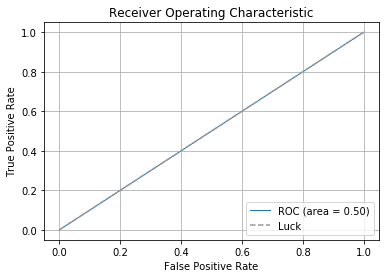

In [5]:
main(0.6)

Threshold: 0.5
True (> 0.5 ): 1
False (< 0.5 ): 155
True Positive: 1 True Negative: 57 
False Positive: 0 False Negative: 98
Accuracy: 0.37
Precision: 1.0
Recall: 0.01
F1-score: 0.02


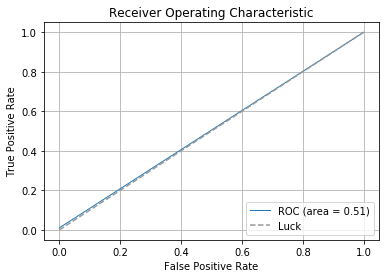

In [6]:
main(0.5)

Threshold: 0.4
True (> 0.4 ): 1
False (< 0.4 ): 155
True Positive: 1 True Negative: 57 
False Positive: 0 False Negative: 98
Accuracy: 0.37
Precision: 1.0
Recall: 0.01
F1-score: 0.02


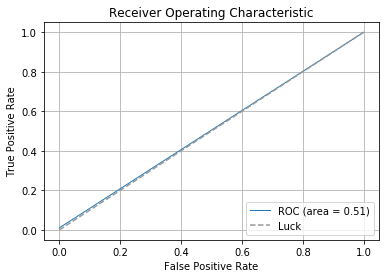

In [7]:
main(0.4)

Threshold: 0.3
True (> 0.3 ): 3
False (< 0.3 ): 153
True Positive: 2 True Negative: 56 
False Positive: 1 False Negative: 97
Accuracy: 0.37
Precision: 0.67
Recall: 0.02
F1-score: 0.04


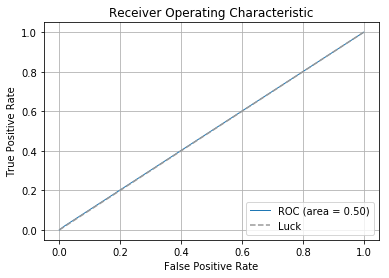

In [8]:
main(0.3)

Threshold: 0.25
True (> 0.25 ): 7
False (< 0.25 ): 149
True Positive: 3 True Negative: 53 
False Positive: 4 False Negative: 96
Accuracy: 0.36
Precision: 0.43
Recall: 0.03
F1-score: 0.06


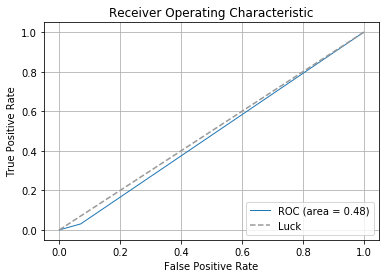

In [9]:
main(0.25)

Threshold: 0.2
True (> 0.2 ): 10
False (< 0.2 ): 146
True Positive: 6 True Negative: 53 
False Positive: 4 False Negative: 93
Accuracy: 0.38
Precision: 0.6
Recall: 0.06
F1-score: 0.11


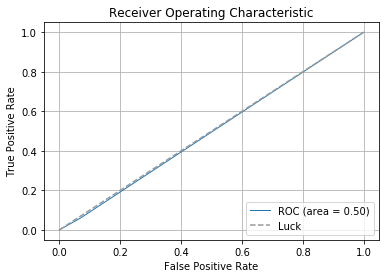

In [10]:
main(0.2)

Threshold: 0.15
True (> 0.15 ): 34
False (< 0.15 ): 122
True Positive: 25 True Negative: 48 
False Positive: 9 False Negative: 74
Accuracy: 0.47
Precision: 0.74
Recall: 0.25
F1-score: 0.38


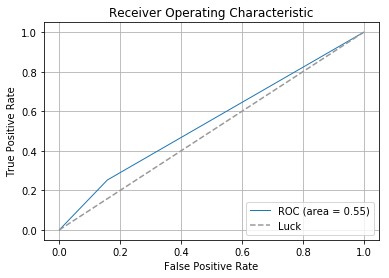

In [11]:
main(0.15)

Threshold: 0.1
True (> 0.1 ): 113
False (< 0.1 ): 43
True Positive: 77 True Negative: 21 
False Positive: 36 False Negative: 22
Accuracy: 0.63
Precision: 0.68
Recall: 0.78
F1-score: 0.73


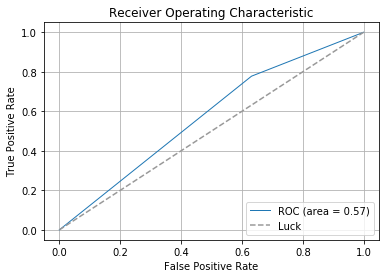

In [12]:
main(0.1)

Threshold: 0.08
True (> 0.08 ): 147
False (< 0.08 ): 9
True Positive: 97 True Negative: 7 
False Positive: 50 False Negative: 2
Accuracy: 0.67
Precision: 0.66
Recall: 0.98
F1-score: 0.79


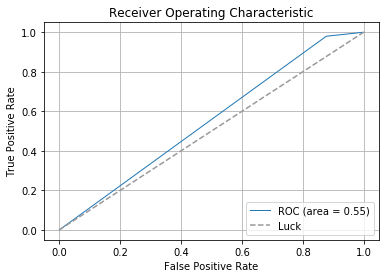

In [13]:
main(0.08)

Threshold: 0.06
True (> 0.06 ): 155
False (< 0.06 ): 1
True Positive: 99 True Negative: 1 
False Positive: 56 False Negative: 0
Accuracy: 0.64
Precision: 0.64
Recall: 1.0
F1-score: 0.78


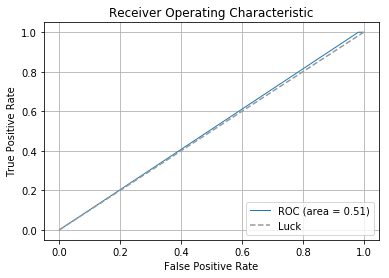

In [14]:
main(0.06)

Threshold: 0.04
True (> 0.04 ): 156
False (< 0.04 ): 0
True Positive: 99 True Negative: 0 
False Positive: 57 False Negative: 0
Accuracy: 0.63
Precision: 0.63
Recall: 1.0
F1-score: 0.78


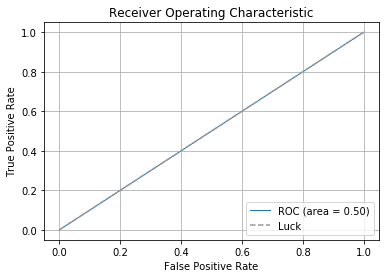

In [15]:
main(0.04)

Threshold: 0.02
True (> 0.02 ): 156
False (< 0.02 ): 0
True Positive: 99 True Negative: 0 
False Positive: 57 False Negative: 0
Accuracy: 0.63
Precision: 0.63
Recall: 1.0
F1-score: 0.78


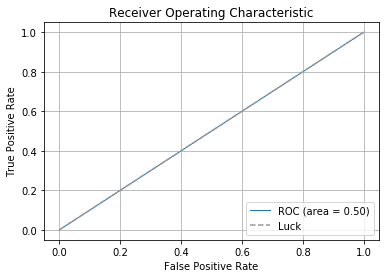

In [16]:
main(0.02)

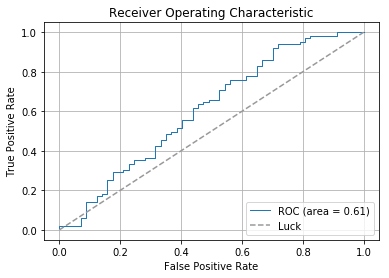

Optimal threshold: 0.088


In [17]:
label = dfAggr['truth'].values.astype(float)
prediction_means = dfAggr['mean'].values.astype(float)

#ROC CURVE
fpr, tpr, thresholds = roc_curve(label, prediction_means)
#print(thresholds)
#print(fpr, tpr)
roc_auc = auc(fpr, tpr)
#print(roc_auc)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

#mean_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr, 'k--',
# label='Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig("data/rocauc.pdf", format="pdf")
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold:', round( optimal_threshold, 4))

Threshold: 0.088
True (> 0.088 ): 134
False (< 0.088 ): 22
True Positive: 93 True Negative: 16 
False Positive: 41 False Negative: 6
Accuracy: 0.7
Precision: 0.69
Recall: 0.94
F1-score: 0.8


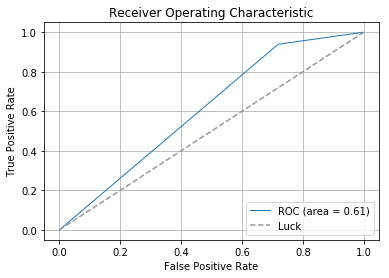

In [18]:
main(0.088)